en el modulo basepc hemos creado un objeto para limpiar los datas mas rapidamente. lo utilizamos a continuacios

In [59]:
from basepc import *

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
train_set = pd.read_csv('./data/train.csv').drop(['laptop_ID'], axis= 1)
test_set = pd.read_csv('./data/test.csv').drop(['laptop_ID'], axis= 1)

In [61]:
limpiador_train = Cleaner(train_set, target= 'Price_euros')

In [62]:
limpiador_train.clean_all()

In [63]:
limpiador_test = Cleaner(test_set, test= True)

In [64]:
limpiador_test.clean_all()

el objeto tiene mas funciones, como representar la cardinalidad, quitar el target y alguno mas. 

de momento vamos a hacer los splits

In [65]:
train = limpiador_train.get_cleaned_train()
test = limpiador_test.get_cleaned_train()

In [66]:
train_set, validation_set = train_test_split(train, test_size= 0.2, random_state= 42)

In [67]:
x_train = train_set.drop(['Price_euros', 'id'], axis= 1)
y_train = train_set['Price_euros']

x_validation = validation_set.drop(['Price_euros', 'id'], axis= 1)
y_validation = validation_set['Price_euros']

voy a normalizar el target para que el modelo tire mejor

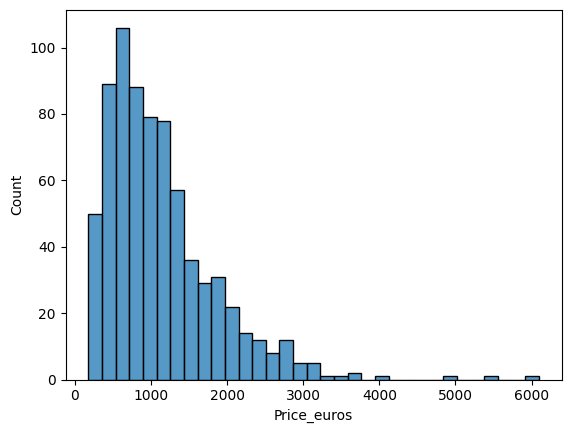

In [68]:
sns.histplot(y_train)
plt.show()

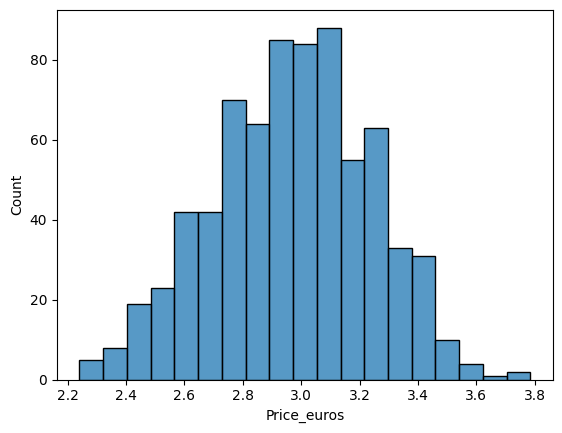

In [69]:
y_train = np.log10(y_train)

sns.histplot(y_train)
plt.show()

## vamos a probar modelos

catboost

In [126]:
model_catboost = CatBoostRegressor(random_state= 42)

In [127]:
model_catboost.fit(x_train, y_train, verbose= 0)

y_pred = model_catboost.predict(x_validation)
y_pred = np.power(10, y_pred) # devolvemos los valores reales a precio

mean_absolute_error(y_validation, y_pred)

159.3155424283438

In [129]:
# vamos a tirar un test aqui para subirlo a kaggle

y_pred = model_catboost.predict(test.drop(['id'], axis= 1))
y_pred = np.power(10, y_pred) # devolvemos los valores reales a precio

In [130]:
test['Price_euros'] = y_pred
submision = test[['id', 'Price_euros']]
submision

,id,Price_euros
0,181,1890.338926
1,708,610.746396
2,862,344.707331
3,1064,1432.537092
4,702,981.978572
...,...,...
386,1281,891.528592
387,524,1954.688944
388,1015,443.417847
389,1236,477.829957


In [74]:
submision.to_csv('submission.csv', index= False)

xgboost

In [75]:
xgboost_model = xgboost.XGBRegressor()

xgboost_model.fit(x_train, y_train)

y_pred = xgboost_model.predict(x_validation)
y_pred = np.power(10, y_pred) # devolvemos los valores reales a precio

mean_absolute_error(y_validation, y_pred)

183.04549742985296

linear regression

In [76]:
lineal_model = LinearRegression()

lineal_model.fit(x_train, y_train)
y_pred = lineal_model.predict(x_validation)
y_pred = np.power(10, y_pred) # devolvemos los valores reales a precio

mean_absolute_error(y_validation, y_pred)

277.2702153740178

gradient regressor

In [77]:
gradient_model = GradientBoostingRegressor(random_state= 42)

gradient_model.fit(x_train, y_train)

y_pred = gradient_model.predict(x_validation)
y_pred = np.power(10, y_pred) # devolvemos los valores reales a precio

mean_absolute_error(y_validation, y_pred)

167.41367499016644

random forest

In [78]:
forest = RandomForestRegressor(random_state= 42)

modelo_forest = forest.fit(x_train, y_train)

y_pred = modelo_forest.predict(x_validation)
y_pred = np.power(10, y_pred) # devolvemos los valores reales a precio

mean_absolute_error(y_validation, y_pred)

187.73393930268503

## hiperparametros

el modelo que mejor ha funcionado ha sido catboost asi que voy a estudiar los hiper con este

In [79]:
x_train

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
25,-1.073731,1.409724,0.332819,0.417157,0.012734,-0.561203,-0.855315,-0.814176,-0.252489,-2.600812,-0.049134
84,-1.556354,-1.455334,0.332819,0.417157,-1.011988,1.388130,-0.855315,-0.037473,-1.829683,0.189706,0.103907
10,-1.073731,1.402224,0.332819,0.417157,-1.011988,-1.340936,-0.855315,-0.814176,-0.252489,0.189706,0.945630
342,-0.591108,-0.450313,0.332819,0.417157,0.012734,-1.340936,-0.038512,-0.814176,-1.829683,-2.600812,0.256947
890,0.132827,-1.755340,0.332819,-0.716815,-1.011988,-1.340936,-0.038512,0.739231,-0.252489,0.189706,-0.140958
...,...,...,...,...,...,...,...,...,...,...,...
106,0.132827,0.299702,0.332819,0.417157,0.012734,-1.340936,-0.855315,1.257033,-0.252489,0.189706,0.103907
270,1.098074,-0.255309,-1.290340,1.622003,0.012734,0.803330,1.595095,-1.461428,1.324705,0.189706,3.225934
860,0.132827,-1.102827,0.332819,-0.716815,0.012734,0.413464,-0.855315,-0.037473,-0.252489,0.189706,-0.844945
435,-0.591108,-0.330311,-1.290340,0.417157,0.012734,0.413464,-0.038512,-0.814176,1.324705,0.189706,0.945630


In [111]:
param_grid = {
    'iterations': [i for i in range(40, 100, 15)],
    'depth': [5, 7, 10, 15],
    'learning_rate': [i for i in np.arange(0.15, 0.31, 0.01)],
    'l2_leaf_reg': [i for i in np.arange(0.5, 21, 0.4)]
}

In [112]:
model_catboost_1 = CatBoostRegressor(random_state= 42)

In [122]:
grid_search = RandomizedSearchCV(model_catboost_1, param_grid, cv=5, n_jobs= -1, scoring= 'neg_mean_absolute_error', verbose= 0)
grid_search.fit(x_train, y_train)

0:	learn: 0.2282567	total: 2ms	remaining: 108ms
1:	learn: 0.1947463	total: 3.88ms	remaining: 103ms
2:	learn: 0.1684213	total: 5.46ms	remaining: 94.6ms
3:	learn: 0.1515074	total: 6.93ms	remaining: 88.4ms
4:	learn: 0.1352887	total: 8.42ms	remaining: 84.2ms
5:	learn: 0.1236278	total: 10.4ms	remaining: 84.9ms
6:	learn: 0.1150743	total: 12.3ms	remaining: 84ms
7:	learn: 0.1092175	total: 13.8ms	remaining: 81ms
8:	learn: 0.1049825	total: 15.3ms	remaining: 78.2ms
9:	learn: 0.1010176	total: 16.7ms	remaining: 75.3ms
10:	learn: 0.0980430	total: 18.4ms	remaining: 73.8ms
11:	learn: 0.0949377	total: 20.1ms	remaining: 72.1ms
12:	learn: 0.0926100	total: 21.7ms	remaining: 69.9ms
13:	learn: 0.0906786	total: 23.2ms	remaining: 67.8ms
14:	learn: 0.0884300	total: 24.6ms	remaining: 65.7ms
15:	learn: 0.0870526	total: 26.5ms	remaining: 64.6ms
16:	learn: 0.0854422	total: 28.4ms	remaining: 63.5ms
17:	learn: 0.0842982	total: 30.1ms	remaining: 61.9ms
18:	learn: 0.0829086	total: 32.4ms	remaining: 61.5ms
19:	learn: 0

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000269E8848A70>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 7, 10, 15],
                                        'iterations': [40, 55, 70, 85],
                                        'l2_leaf_reg': [0.5, 0.9, 1.3,
                                                        1.7000000000000002, 2.1,
                                                        2.5, 2.9000000000000004,
                                                        3.3000000000000003, 3.7,
                                                        4.1, 4.5, 4.9,
                                                        5.300000000000001, 5.7,
                                                        6.1000000000000005, 6.5,
                                                        6.9, 7.300000000000001,
                                                        7.7...
                                                        12.100000000000001, ...],
                                        'learning_rate': [0.15, 0.16, 0.17,
                                                          0.18000000000000002,
                                                          0.19000000000000003,
                                                          0.20000000000000004,
                                                          0.21000000000000005,
                                                          0.22000000000000006,
                                                          0.23000000000000007,
                                                          0.24000000000000007,
                                                          0.2500000000000001,
                                                          0.2600000000000001,
                                                          0.27000000000000013,
                                                          0.28000000000000014,
                                                          0.29000000000000015,
                                                          0.30000000000000016]},
                   scoring='neg_mean_absolute_error')

In [123]:
grid_search.best_params_

{'learning_rate': 0.28000000000000014,
 'l2_leaf_reg': 3.7,
 'iterations': 55,
 'depth': 7}

In [124]:
best_catboost = grid_search.best_estimator_

In [125]:
y_pred = best_catboost.predict(x_validation)
y_pred = np.power(10, y_pred)

mean_absolute_error(y_validation, y_pred)

172.94692061232112